In [ ]:
#Implementation of XGBOOST Algorithm 

#Data processing
#Hyperparameter tuning - Hyperparameter Grid
#Feature importance Analysis
#Model Evaluation 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, auc
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [ ]:
#Data Preprocessing

data=load_breast_cancer()
X=pd.DataFrame(data.data, columns=data.feature_names)
y=data.target

#Handling the missing values
imputer=SimpleImputer(strategy='mean')
X=imputer.fit_transform(X)

#Feature Scaling
scaler=StandardScaler()
X=scaler.fit_transform(X)



Fitting 3 folds for each of 32 candidates, totalling 96 fits


<Figure size 1000x800 with 0 Axes>

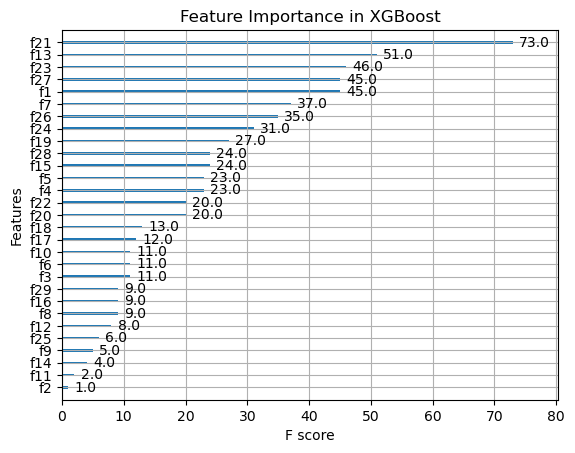

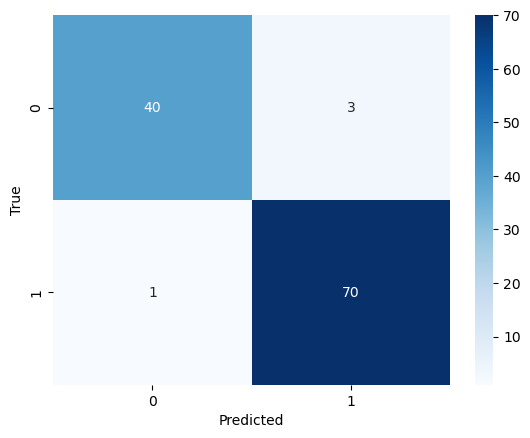

In [5]:
#Hyper Parameter Tuning with model definition

xgb_model=xgb.XGBClassifier(eval_metric='logloss')

param_grid={
    'n_estimators': [100,200],
    'learning_rate': [0.01,0.1],
    'max_depth':[3,4],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9]
}

#Using Grid search to find best prameters

grid_search=GridSearchCV(estimator=xgb_model,param_grid=param_grid,scoring='accuracy',cv=3,verbose=1)
grid_search.fit(X,y)

#Best Parameters
best_params=grid_search.best_params_
best_model=grid_search.best_estimator_

#Plot feature importance
plt.figure(figsize=(10,8))
xgb.plot_importance(best_model,importance_type='weight')
plt.title('Feature Importance in XGBoost')
plt.show()

# Evaluation Metrics
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=42)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
classification_rep=classification_report(y_test,y_pred)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, fmt='d',cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
